# Flight Price Predication

### Importing require library

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [31]:
# Importing dataset excel file using pandas.
df= pd.read_excel('Flight_Price_dataset.xlsx')

In [32]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()

No. of Rows : 3073
No. of Columns : 10


,Airline,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,Go First,G8-2501,"Mon, 19 Sep 2022",02:40,04:50,New Delhi,Mumbai,Non Stop,2h 10m,5950
1,Go First,G8-336,"Mon, 19 Sep 2022",14:30,16:40,New Delhi,Mumbai,Non Stop,2h 10m,5950
2,SpiceJet,SG-8709,"Mon, 19 Sep 2022",19:00,21:10,New Delhi,Mumbai,Non Stop,2h 10m,5950
3,Go First,G8-330,"Mon, 19 Sep 2022",20:50,23:00,New Delhi,Mumbai,Non Stop,2h 10m,5950
4,Go First,G8-323,"Mon, 19 Sep 2022",18:20,20:35,New Delhi,Mumbai,Non Stop,2h 15m,5950


In [33]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Aeroplane', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration']}

Training dataset contain 3073 rows and 10 columns.

Our Target variable is Price. We gone predict flight prices using Various Regression Algorithms.

Some feature with date and time related columns are mention with object datatype. We gone convert them into datetime datatype format along with going to perform some feature engineering over them to create few new columns of our interest.

### Data Integrity Check

In [34]:
df.duplicated().sum()

337

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.shape

(2736, 10)

In [37]:
df.isin([' ','?','-','null','NA']).sum().any()

False

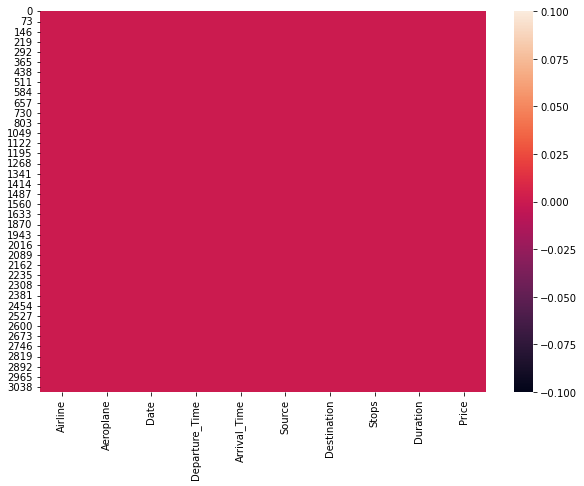

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())
plt.show()

###### Dataset doesnot contain duplicate data or any missing value.

### Data Preprocessing

#### Conversion of Duration column hr & Minutes format to Minutes

In [39]:
df['Duration'] = df['Duration'].map(lambda x : x.replace('05m','5m'))

In [40]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration']= pd.to_numeric(df['Duration'])

In [41]:
df

,Airline,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,Go First,G8-2501,"Mon, 19 Sep 2022",02:40,04:50,New Delhi,Mumbai,Non Stop,130,5950
1,Go First,G8-336,"Mon, 19 Sep 2022",14:30,16:40,New Delhi,Mumbai,Non Stop,130,5950
2,SpiceJet,SG-8709,"Mon, 19 Sep 2022",19:00,21:10,New Delhi,Mumbai,Non Stop,130,5950
3,Go First,G8-330,"Mon, 19 Sep 2022",20:50,23:00,New Delhi,Mumbai,Non Stop,130,5950
4,Go First,G8-323,"Mon, 19 Sep 2022",18:20,20:35,New Delhi,Mumbai,Non Stop,135,5950
...,...,...,...,...,...,...,...,...,...,...
3068,Vistara,UK-871/874,"Wed, 5 Oct 2022",20:35,10:00\n+ 1 day,New Delhi,Mumbai,1 Stop,805,15195
3069,Air India,AI-885/697,"Wed, 5 Oct 2022",10:45,00:35\n+ 1 day,New Delhi,Mumbai,1 Stop,830,20025
3070,Air India,AI-885/664,"Wed, 5 Oct 2022",10:45,16:35,New Delhi,Mumbai,1 Stop,350,22493
3071,Go First,G8-286/2606,"Wed, 5 Oct 2022",10:40,18:50,New Delhi,Mumbai,1 Stop,490,33652


#### Create new column for day & date

In [42]:
df['Day']= df['Date'].map(lambda x :x[:3])

In [43]:
df['Date']= df['Date'].map(lambda x :x[4:])

In [47]:
Categorical = ['Airline','Day','Stops','Aeroplane']

In [48]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('='*100)

Airline
IndiGo       734
Air India    689
Vistara      628
Go First     283
SpiceJet     263
Air Asia     139
Name: Airline, dtype: int64
Day
Wed    510
Tue    501
Mon    365
Sat    358
Fri    341
Thu    334
Sun    327
Name: Day, dtype: int64
Stops
1 Stop       1895
Non Stop      829
2 Stop(s)      12
Name: Stops, dtype: int64
Aeroplane
UK-941          17
6E-5318         17
AI-805          17
UK-933          17
UK-951          17
UK-927          17
6E-5328         17
6E-2114         17
6E-2017         17
6E-2009         17
6E-2519         17
6E-864          17
6E-5342         17
6E-5306         17
G8-330          17
SG-8169         17
SG-711          17
G8-336          17
6E-6373/6425    16
G8-717/413      16
AI-433/634      16
6E-212/6031     16
UK-829/878      16
6E-2141/5302    16
6E-7403/577     16
I5-744/632      16
6E-2141/803     16
6E-786/6571     16
AI-540/571      16
6E-2033/6004    16
AI-540/569      16
AI-636          16
UK-637/652      16
6E-607/6004     16
SG-8171/487    

In [49]:
df.describe(include=object)

,Airline,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Day
count,2736,2736,2736,2736,2736,2736,2736,2736,2736
unique,6,269,17,123,164,1,1,3,7
top,IndiGo,UK-941,5 Oct 2022,07:20,00:40\n+ 1 day,New Delhi,Mumbai,1 Stop,Wed
freq,734,17,187,109,79,2736,2736,1895,510


### Exploratory Data Analysis

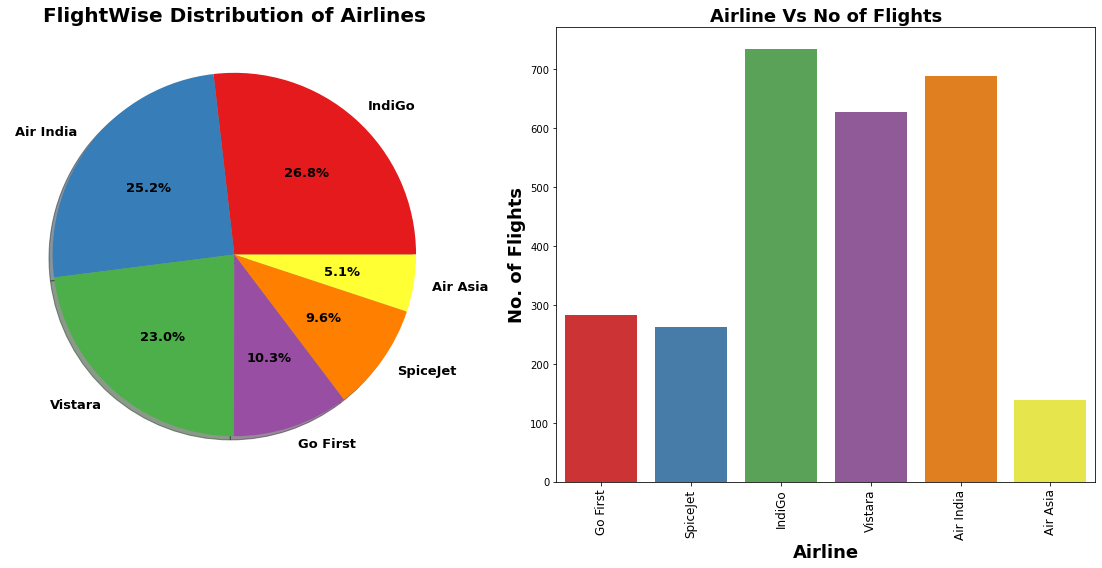

In [50]:
# Pie & count plot of Airline types
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Airline'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('FlightWise Distribution of Airlines', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Airline',data=df,ax=ax[1])
ax[1].set_title('Airline Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Airline",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation= 90)
plt.tight_layout()
plt.show()

###### Maximum no of Flight runs by Indigo followed by Air India

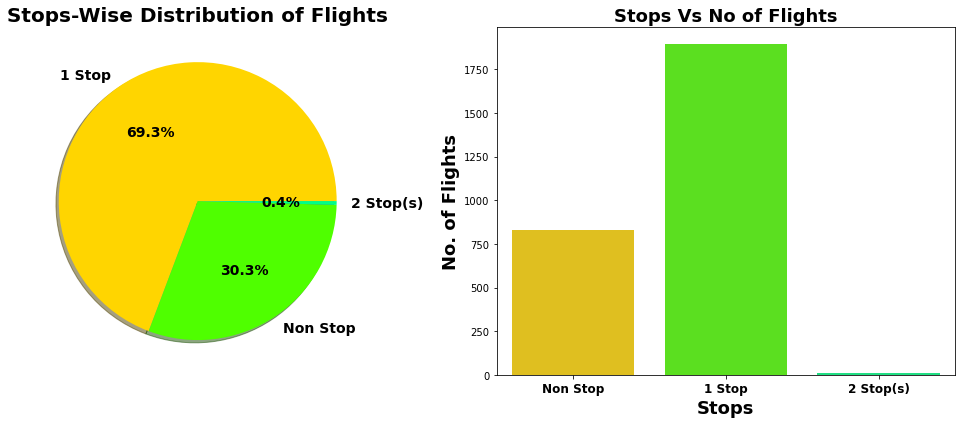

In [52]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Stops'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Stops-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Stops',data=df,ax=ax[1])
ax[1].set_title('Stops Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Stops",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

###### 69.3% flights take single stop in there way from New Dehli to Mumbai.It is also possible that these flights may have high flight duration compare to Non-stop Flight
###### 30.3% of flights do not have any stop in there route.

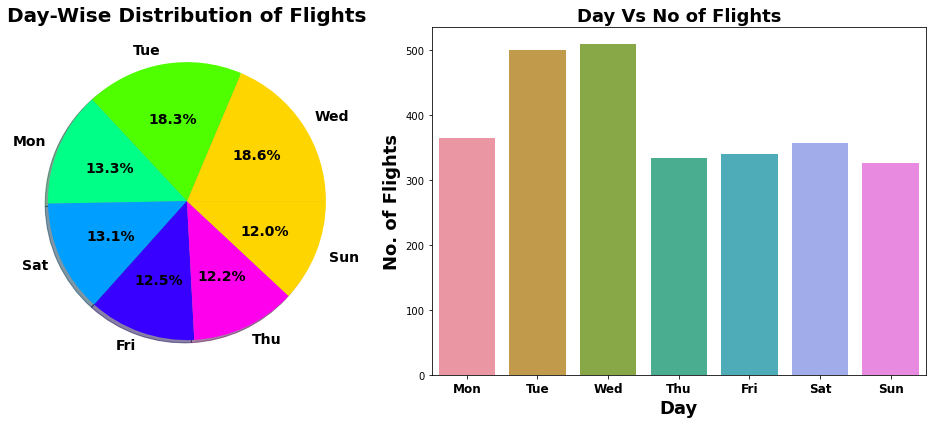

In [53]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Day'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Day-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Day',data=df,ax=ax[1])
ax[1].set_title('Day Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Day",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()


###### On Wednesday Maximum flights run while on saturday minimum flights run



###### It will be interesting to investigate variation of fare as per different week days.

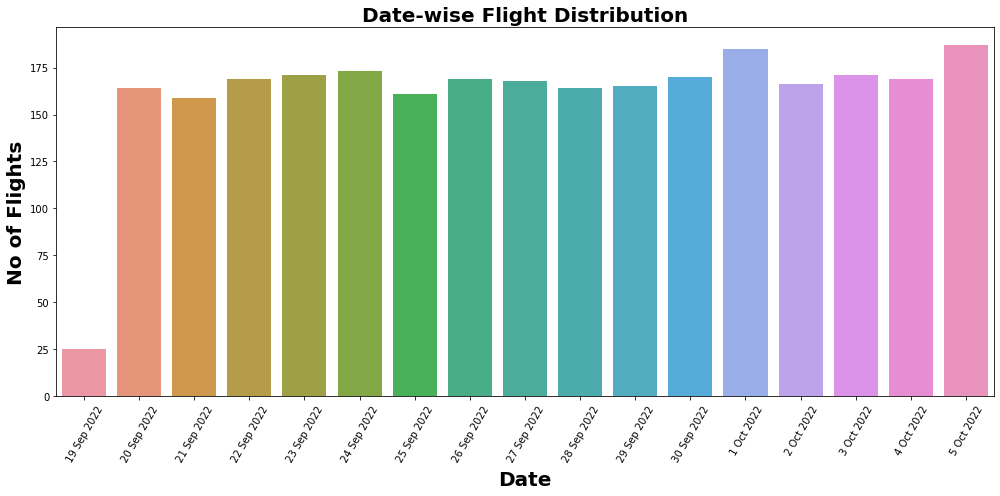

In [58]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(14,7))
sns.countplot(x=df['Date'])
plt.title("Date-wise Flight Distribution",fontsize=20,fontweight ='bold')
plt.xlabel('Date',fontsize = 20,fontweight ='bold')
plt.xticks(rotation=60)
plt.ylabel('No of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()


###### We can see those Maximum flights schedule on 1 oct 2022 & Minimum flights schedule on 19 sep 2022.

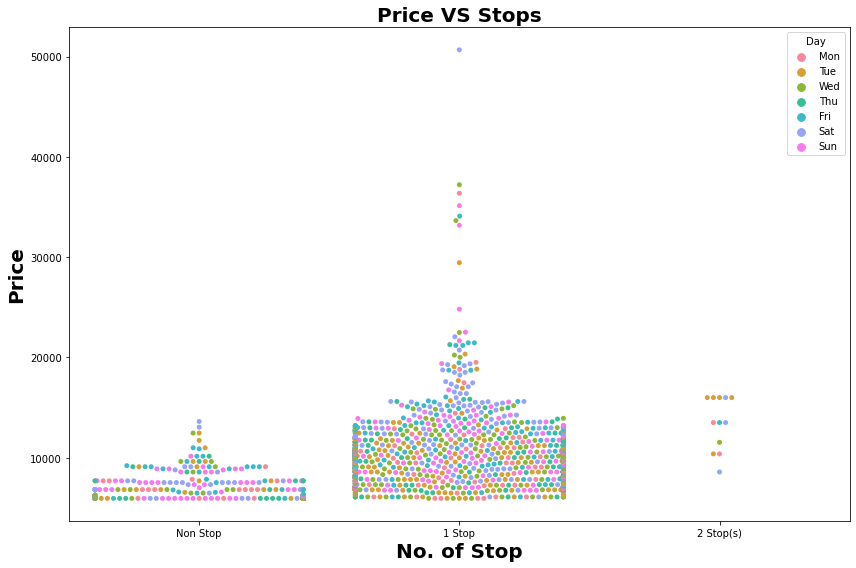

In [59]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(12,8))
sns.swarmplot(y=df['Price'],x=df['Stops'], hue= df['Day'])
plt.title("Price VS Stops",fontsize=20,fontweight ='bold')
plt.xlabel('No. of Stop',fontsize = 20,fontweight ='bold')
plt.ylabel('Price',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

### Feature Engineering

##### Encoding Categorical Data

In [60]:
# Dropping Unnecessary columns
df.drop(columns=['Departure_Time','Arrival_Time','Source','Destination'], inplace= True)

In [61]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price'], object: ['Airline', 'Aeroplane', 'Date', 'Stops', 'Day']}

In [62]:
Categorical = ['Airline', 'Aeroplane', 'Date', 'Stops', 'Day']
Numerical = ['Duration', 'Price']

In [64]:
df['Aeroplane']= df['Aeroplane'].map(lambda x: str(x).replace('-',''))
df['Aeroplane']= df['Aeroplane'].map(lambda x: str(x).replace('/',''))

In [65]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] =le.fit_transform(df[i])
df.head()

,Airline,Aeroplane,Date,Stops,Duration,Price,Day
0,2,141,1,2,130,5950,1
1,2,154,1,2,130,5950,1
2,4,204,1,2,130,5950,1
3,2,152,1,2,130,5950,1
4,2,150,1,2,135,5950,1


##### Outliers Detection & Removal

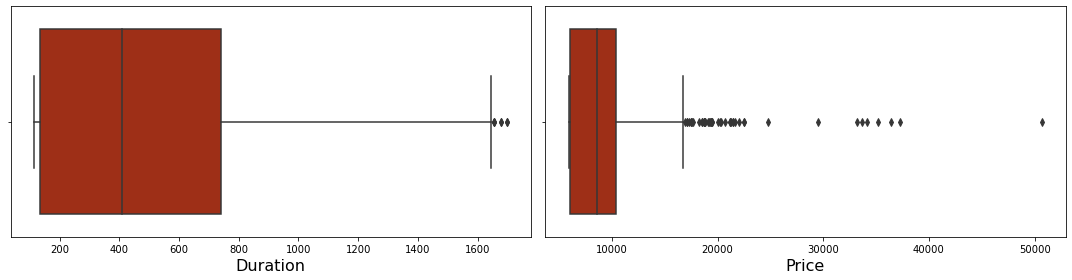

In [67]:
plt.figure(figsize=(15,4))
plt_num = 1
for i in Numerical:
    if plt_num <= 2:
        ax = plt.subplot(1,2,plt_num)
        sns.boxplot(df[i], palette='gnuplot')
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

From Boxplot we can see presense of outliers.

##### Correlation

In [68]:
df.corr()

,Airline,Aeroplane,Date,Stops,Duration,Price,Day
Airline,1.000000,0.517806,0.002436,0.132606,-0.038105,-0.167045,0.017508
Aeroplane,0.517806,1.000000,0.013022,0.054621,0.144748,0.128160,0.016976
Date,0.002436,0.013022,1.000000,-0.019816,0.000240,-0.089739,0.119203
Stops,0.132606,0.054621,-0.019816,1.000000,-0.630532,-0.552834,-0.013105
Duration,-0.038105,0.144748,0.000240,-0.630532,1.000000,0.385374,0.007076
Price,-0.167045,0.128160,-0.089739,-0.552834,0.385374,1.000000,-0.056703
Day,0.017508,0.016976,0.119203,-0.013105,0.007076,-0.056703,1.000000


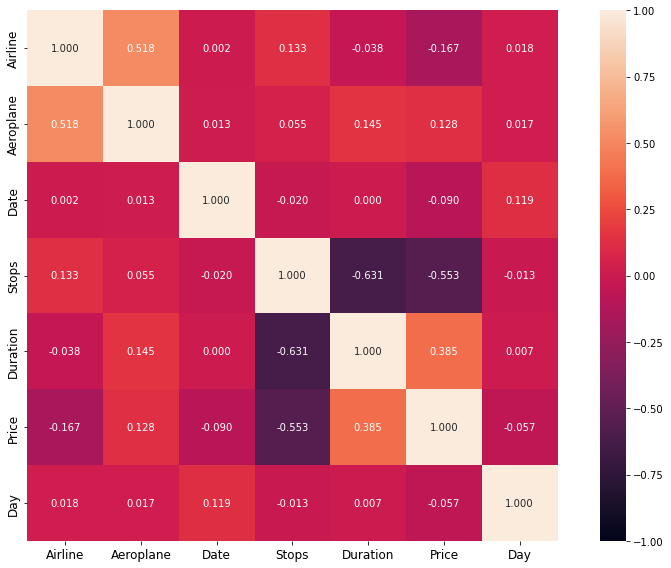

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

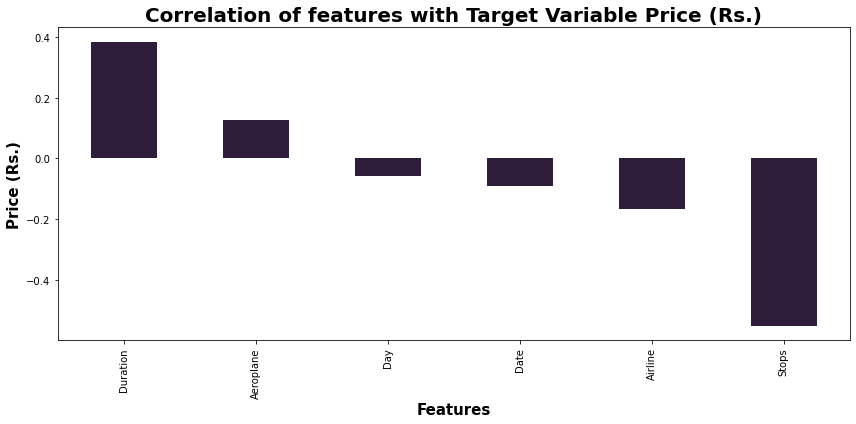

In [71]:
plt.figure(figsize = (12,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

##### Skewness detection

In [72]:
df.skew()

Airline      0.002054
Aeroplane    0.113998
Date        -0.075094
Stops        0.846558
Duration     1.086513
Price        3.111595
Day         -0.169051
dtype: float64

### Standard Scaling

In [73]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

### Model Building

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.2)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (2188, 6)
Training Target Vector Size : (2188,)
Test Feature Matrix Size: (548, 6)
Test Target Vector Size: (548,)


##### Best Random state

In [115]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.22)
    rf=RandomForestRegressor()
    rf.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5447694714674968 on Random_state 67


##### Linear Regression

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 34, test_size=0.2)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 1346.4714650133378
Mean squared error : 3657402.548861266
Root Mean squared error : 1912.433671754727
 R2 Score :
47.93261953393117


In [83]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.364443692183895


##### Random Forest Regressor

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 34, test_size=0.2)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 765.6459306569343
Mean squared error : 1682120.0872093067
Root Mean squared error : 1296.9657232206666
R2 Score of Random Forest Regressor :
76.05306350606304


In [92]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.4029536452232735


##### Decision Tree Regressor

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 34, test_size=0.2)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 781.8594890510949
Mean squared error : 2621700.4945255476
Root Mean squared error : 1619.1666049315454
R2 Score of Decision Tree Regressor :
62.677043258734685


In [122]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.05728028307536075


#### Extra Trees Regressor

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 34, test_size=0.2)
etc = ExtraTreesRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 814.6806569343066
Mean squared error : 2752364.848540146
Root Mean squared error : 1659.0252706152928
R2 Score of Extra Tree Regressor :
60.81688415867899


In [125]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.42592037135554833


##### XGB Regressor

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 34, test_size=0.2)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 804.1185151260264
Mean squared error : 1923901.283536315
Root Mean squared error : 1387.0476861075524
R2 Score of XGB Regressor :
72.6110268774674


In [129]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.47489552904895804


We can see that Random Forest Regressor gives maximum R2 score of 76.05 and maximum cross validation score.

#### Hyper Parameter Tuning 

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=34, test_size=0.2)

In [132]:
parameter = {
 'bootstrap': [True, False],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4 ],
 'n_estimators': [100, 500,1000,1500,2000]}

In [133]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10,n_jobs = -1)

In [134]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 1000, 1500, 2000]},
             verbose=10)

In [135]:
GCV.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [139]:
Final_mod=RandomForestRegressor(max_depth = None, bootstrap = True, max_features='auto', min_samples_leaf = 1,
                                n_estimators = 1000 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 75.36025899073788
mean_squared_error: 1730785.201096958
mean_absolute_error: 766.3439689781022
RMSE value: 1315.593098604944


#### Saving Model

In [140]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

#### Predictions

In [141]:
# Loading the saved model
model = joblib.load("Flight_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([12089.732,  6097.665,  6755.855,  8208.612,  6042.43 ,  9104.453,
        8202.885,  6091.456,  5954.   ,  7033.735, 10848.686, 10455.935,
        8932.984,  7369.444,  9964.844,  6044.831,  6037.816,  9755.753,
       10605.022,  8846.737, 10373.252,  8997.276,  5973.58 ,  6315.916,
        8724.036, 11787.116,  8831.627, 10871.204, 11281.607,  6680.599,
        5954.   ,  9998.562,  8143.419, 11914.574, 11638.044, 10361.023,
        5987.023,  9763.152,  6438.269, 10803.783,  7547.894, 12023.718,
        5966.025,  8907.168,  9493.381,  5964.518, 12116.366,  9823.51 ,
        9349.799,  6052.906,  9323.116,  7014.252, 13291.555,  7988.134,
        6954.635,  8828.615,  5986.273,  9720.273,  7919.954, 11758.787,
        8026.533,  9880.426,  6040.155,  7278.912, 10340.966,  6066.273,
        6900.859, 10301.27 ,  7320.571,  9625.115,  8472.846,  5954.   ,
       13615.719,  7275.718,  6029.261,  5954.   ,  7570.997,  6183.094,
       11747.673, 12570.778,  7436.683, 11255.678, 

In [142]:
pd.DataFrame([model.predict(X_test)[:], Y_test[:]], index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547
Predicted,12089.732,6097.665,6755.855,8208.612,6042.43,9104.453,8202.885,6091.456,5954.0,7033.735,10848.686,10455.935,8932.984,7369.444,9964.844,6044.831,6037.816,9755.753,10605.022,8846.737,10373.252,8997.276,5973.58,6315.916,8724.036,11787.116,8831.627,10871.204,11281.607,6680.599,5954.0,9998.562,8143.419,11914.574,11638.044,10361.023,5987.023,9763.152,6438.269,10803.783,7547.894,12023.718,5966.025,8907.168,9493.381,5964.518,12116.366,9823.51,9349.799,6052.906,9323.116,7014.252,13291.555,7988.134,6954.635,8828.615,5986.273,9720.273,7919.954,11758.787,8026.533,9880.426,6040.155,7278.912,10340.966,6066.273,6900.859,10301.27,7320.571,9625.115,8472.846,5954.0,13615.719,7275.718,6029.261,5954.0,7570.997,6183.094,11747.673,12570.778,7436.683,11255.678,6345.9,10679.144,11722.492,10525.056,12277.603,11062.197,8384.361,9291.821,7474.0,8573.626,14063.279,12818.795,7546.149,13107.204,10874.286,6316.246,15221.975,5955.26,9024.579,10875.382,8761.112,12017.608,11370.795,6080.915,8695.438,10907.278,5950.161,15407.26,7612.559,10325.115,13485.493,5972.646,10425.639,11410.257,6582.667,5954.0,6017.124,11175.711,7004.527,9575.536,13351.392,10406.995,9836.113,10350.209,6026.518,6033.541,8922.973,8111.878,7443.893,7083.473,9913.469,10667.159,7654.388,5976.89,10473.072,10174.524,5958.979,11013.527,7349.435,10061.722,11473.905,11180.887,8044.873,5987.595,9363.787,10181.747,5960.324,8905.148,9616.852,10888.311,7692.598,6006.92,7067.844,7530.803,10374.666,10844.351,8355.472,8675.636,7765.879,9280.727,6059.84,5954.0,13760.486,11125.818,8610.112,5979.405,6171.894,10645.173,8904.475,7169.166,5996.474,11815.583,11319.594,9200.916,10736.097,6801.615,11835.782,14754.719,6470.597,13946.274,8127.474,8704.85,8802.9,12298.556,11839.592,5962.82,6884.154,10439.765,7058.296,7074.939,5985.658,6966.725,10074.171,5958.706,11363.136,7510.457,5961.381,8952.618,8692.788,6077.844,5984.66,7859.345,5954.0,13186.317,7489.699,6491.